# Fashion-MNIST classification

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
from tensorflow import keras

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

In [3]:
labels = [
    'top', 'trousers', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [4]:
val_x, val_y = test_x[:5000], test_y[:5000]
test_x, test_y = test_x[5000:], test_y[5000:]

In [5]:
print(f'Images shape: {train_x.shape} : {val_x.shape} : {test_x.shape}')
print(f'Labels shape: {train_y.shape} : {val_y.shape} : {test_y.shape}')

Images shape: (60000, 28, 28) : (5000, 28, 28) : (5000, 28, 28)
Labels shape: (60000,) : (5000,) : (5000,)


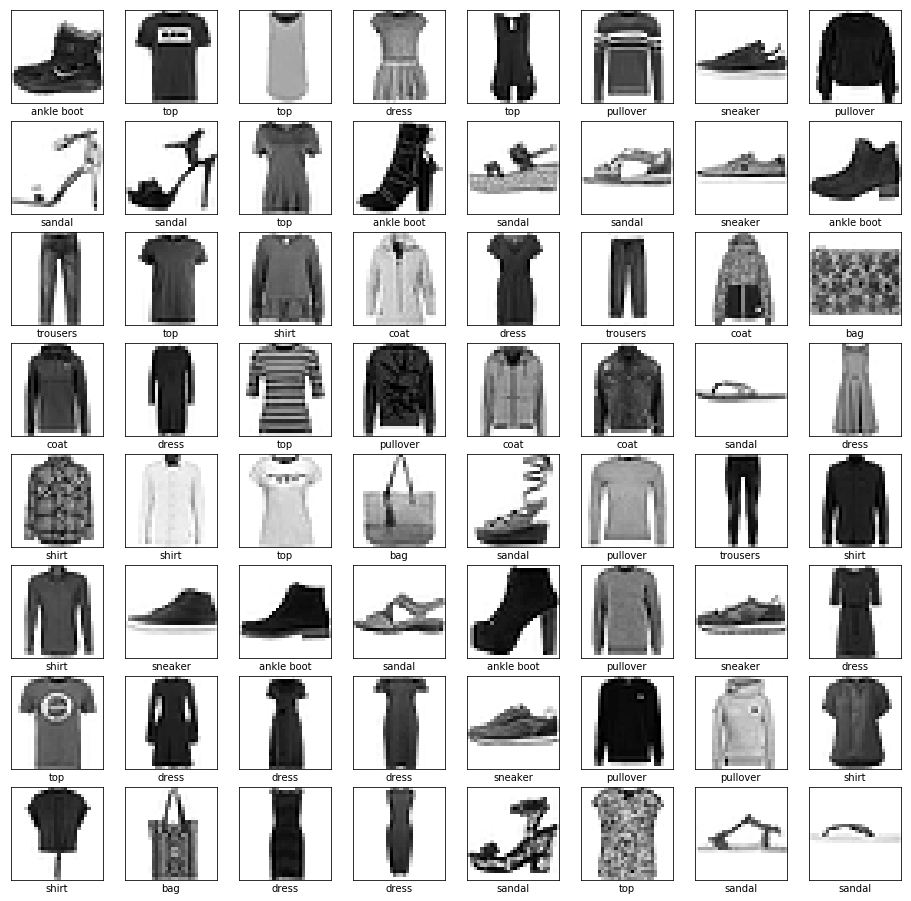

In [6]:
images_n = 8
plt.figure(figsize=(16, 16))
for i in range(images_n ** 2):
    plt.subplot(images_n, images_n, i + 1)
    plt.imshow(train_x[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_y[i]])
    plt.xticks([])
    plt.yticks([])
plt.show()

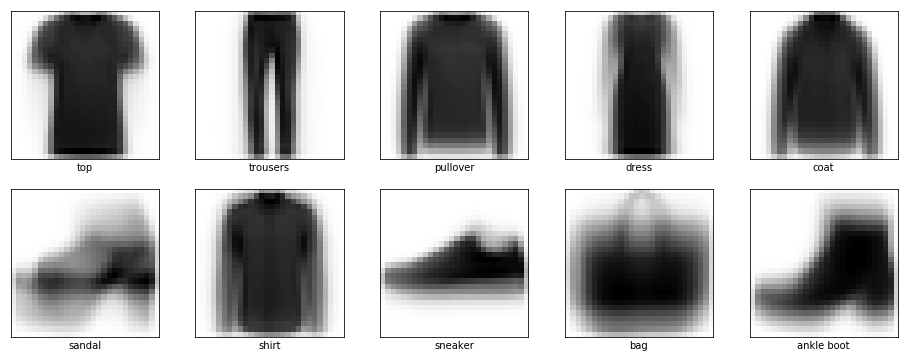

In [7]:
centroids = [(labels[i], np.mean(train_x[train_y == i], axis=0)) for i in np.unique(train_y)]

plt.figure(figsize=(16, 6))
for i, (label, image) in enumerate(centroids):
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(label)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [8]:
train_x = train_x / 255
val_x = val_x / 255
test_x = test_x / 255

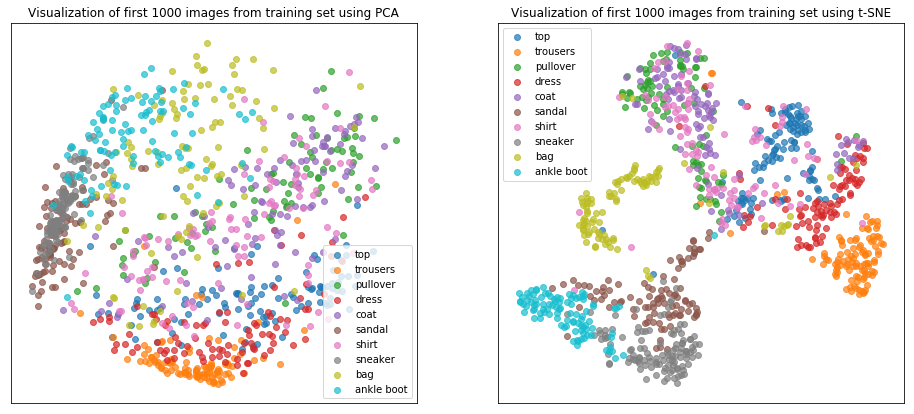

In [9]:
points_n = 1000
plt.figure(figsize=(16, 7))
for i, (alg_name, alg) in enumerate([
        ('PCA', PCA(n_components=2)), ('t-SNE', TSNE(n_components=2))]):
    x = alg.fit_transform(train_x[:points_n].reshape(-1, 784))
    y = train_y[:points_n]
    data = [(labels[i], x[y == i]) for i in np.unique(y)]
    
    plt.subplot(1, 2, i + 1)
    for label, points in data:
        plt.scatter(points[:, 0], points[:, 1], alpha=0.7, label=label)
    plt.title(f'Visualization of first {points_n} images from training set using {alg_name}')
    plt.legend()
    plt.xticks([])
    plt.yticks([])
plt.show()

In [10]:
def plot_history(history):
    plt.figure(figsize=(16, 5))
    for i, (name, key) in enumerate([('accuracy', 'acc'), ('loss', 'loss')]):
        plt.subplot(1, 2, i + 1)
        plt.plot(history.epoch, history.history[key], label=f'training {name}')
        plt.plot(history.epoch, history.history[f'val_{key}'], label=f'validation {name}')
        plt.title(f'Visualization of {name} during training')
        plt.legend()
        plt.xlabel('epoch')
        plt.ylabel(name)
    plt.show()
    
    
def plot_confusion_matrix(cm, labels=labels):
    plt.figure(figsize=(7, 7))
    plt.imshow(cm, cmap=plt.cm.binary)
    threshold = np.max(cm) / 2
    for i in range(len(labels)):
        for j in range(len(labels)):
            plt.text(
                j, i, cm[i, j], color='white' if cm[i, j] > threshold else 'black',
                horizontalalignment='center', verticalalignment='center')
    plt.title('Confusion matrix')
    plt.xlabel('predicted label')
    plt.xticks(range(len(labels)), labels, rotation=90)
    plt.ylabel('true label')
    plt.yticks(range(len(labels)), labels)
    plt.show()

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(
    train_x,
    train_y,
    validation_data=(val_x, val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 4s - loss: 0.7294 - acc: 0.7434 - val_loss: 0.4979 - val_acc: 0.8260
Epoch 2/50
 - 2s - loss: 0.5092 - acc: 0.8207 - val_loss: 0.4342 - val_acc: 0.8520
Epoch 3/50
 - 2s - loss: 0.4635 - acc: 0.8339 - val_loss: 0.4226 - val_acc: 0.8512
Epoch 4/50
 - 2s - loss: 0.4374 - acc: 0.8421 - val_loss: 0.3971 - val_acc: 0.8582
Epoch 5/50
 - 2s - loss: 0.4188 - acc: 0.8474 - val_loss: 0.3848 - val_acc: 0.8602
Epoch 6/50
 - 2s - loss: 0.4032 - acc: 0.8536 - val_loss: 0.3858 - val_acc: 0.8618
Epoch 7/50
 - 2s - loss: 0.3941 - acc: 0.8562 - val_loss: 0.3677 - val_acc: 0.8700
Epoch 8/50
 - 2s - loss: 0.3828 - acc: 0.8606 - val_loss: 0.3684 - val_acc: 0.8698
Epoch 9/50
 - 2s - loss: 0.3764 - acc: 0.8625 - val_loss: 0.3658 - val_acc: 0.8676
Epoch 10/50
 - 2s - loss: 0.3711 - acc: 0.8640 - val_loss: 0.3556 - val_acc: 0.8700
Epoch 11/50
 - 2s - loss: 0.3631 - acc: 0.8669 - val_loss: 0.3558 - val_acc: 0.8704
Epoch 12/50
 - 2s - loss: 0.3604 - a

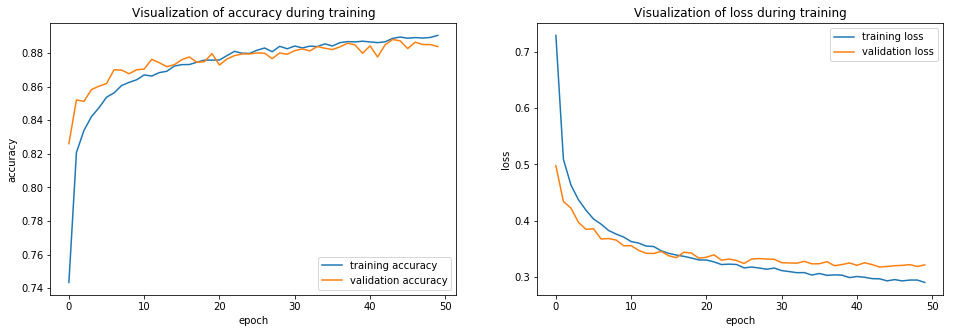

In [13]:
plot_history(history)

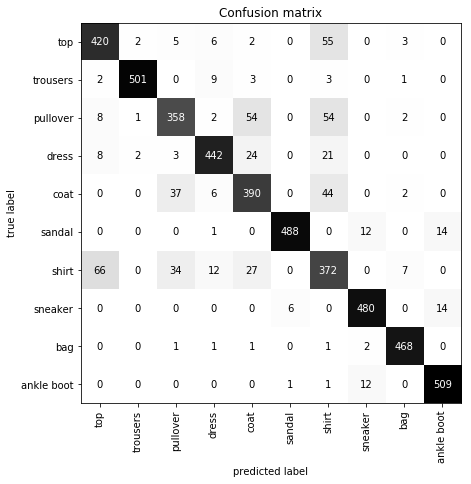

In [14]:
cm = confusion_matrix(test_y, model.predict(test_x).argmax(axis=-1))
plot_confusion_matrix(cm)

In [15]:
_, acc = model.evaluate(test_x, test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 88.56%


In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(128, kernel_size=(1, 1), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')])
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         8320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
__________

In [17]:
history = model.fit(
    train_x.reshape(-1, 28, 28, 1),
    train_y,
    validation_data=(val_x.reshape(-1, 28, 28, 1), val_y),
    epochs=50, batch_size=250,
    verbose=2)

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
 - 32s - loss: 0.9189 - acc: 0.6624 - val_loss: 0.5415 - val_acc: 0.7972
Epoch 2/50
 - 29s - loss: 0.5541 - acc: 0.7947 - val_loss: 0.4501 - val_acc: 0.8342
Epoch 3/50
 - 29s - loss: 0.4711 - acc: 0.8298 - val_loss: 0.3944 - val_acc: 0.8560
Epoch 4/50
 - 28s - loss: 0.4286 - acc: 0.8448 - val_loss: 0.3616 - val_acc: 0.8694
Epoch 5/50
 - 29s - loss: 0.3979 - acc: 0.8555 - val_loss: 0.3573 - val_acc: 0.8754
Epoch 6/50
 - 29s - loss: 0.3690 - acc: 0.8666 - val_loss: 0.3327 - val_acc: 0.8810
Epoch 7/50
 - 29s - loss: 0.3573 - acc: 0.8707 - val_loss: 0.3237 - val_acc: 0.8828
Epoch 8/50
 - 29s - loss: 0.3415 - acc: 0.8763 - val_loss: 0.3164 - val_acc: 0.8882
Epoch 9/50
 - 29s - loss: 0.3276 - acc: 0.8815 - val_loss: 0.3089 - val_acc: 0.8908
Epoch 10/50
 - 29s - loss: 0.3193 - acc: 0.8838 - val_loss: 0.3082 - val_acc: 0.8888
Epoch 11/50
 - 31s - loss: 0.3058 - acc: 0.8886 - val_loss: 0.2998 - val_acc: 0.8930
Epoch 12/50
 - 30s - loss

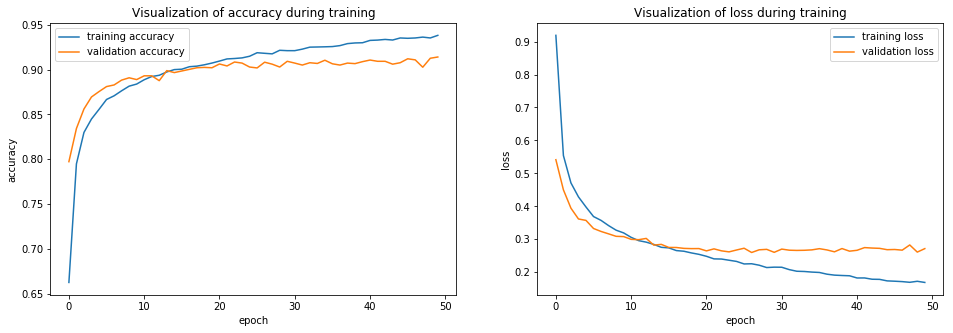

In [18]:
plot_history(history)

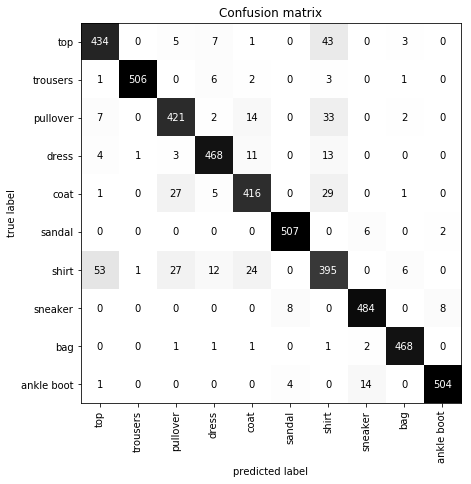

In [19]:
cm = confusion_matrix(test_y, model.predict(test_x.reshape(-1, 28, 28, 1)).argmax(axis=-1))
plot_confusion_matrix(cm)

In [20]:
_, acc = model.evaluate(test_x.reshape(-1, 28, 28, 1), test_y, verbose=0)
print(f'Accuracy on test set: {100 * acc:.2f}%')

Accuracy on test set: 92.06%
